pixar movies analysis

In [1]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

%matplotlib inline

# import dataset
pixar_movies = pd.read_csv("PixarMovies.csv")

# determine dimensions of the datatable
row_number = pixar_movies.shape[0]
column_number = pixar_movies.shape[1]

# print out the entire table, the datatypes of all the columns and the results
# of the describe method to get a first insight into the dataset
print(80 * "-")
print(pixar_movies.head(row_number))
print(80 * "-")
print(pixar_movies.dtypes)
print(80 * "-")
print(pixar_movies.describe())
print(80 * "-")



--------------------------------------------------------------------------------
    Year Released                Movie  Length  RT Score  IMDB Score  \
0            1995            Toy Story      81       100         8.3   
1            1998         A Bug's Life      96        92         7.2   
2            1999          Toy Story 2      92       100         7.9   
3            2001       Monsters, Inc.      90        96         8.1   
4            2003         Finding Nemo     104        99         8.2   
5            2004      The Incredibles     115        97         8.0   
6            2006                 Cars     116        74         7.2   
7            2007          Ratatouille     111        96         8.0   
8            2008               WALL-E      97        96         8.4   
9            2009                   Up      96        98         8.3   
10           2010          Toy Story 3     103        99         8.4   
11           2011               Cars 2     113        3

data cleaning

In [2]:
# get rid of the %-sign in the "Domestic %" and "International %" columns and convert
# their datatypes to float, use the series attribute str to apply the rstrip function to
# each row and strip the %-sign
pixar_movies["Domestic %"] = pixar_movies["Domestic %"].str.rstrip("%").astype(float)
pixar_movies["International %"] = pixar_movies["International %"].str.rstrip("%").astype(float)

# convert the "IMDB Score" column from a 10 point scale to a 100 point scale
pixar_movies["IMDB Score"] = pixar_movies["IMDB Score"] * 10

# get rid of the rows containing NaN values
filtered_pixar = pixar_movies.dropna()

# set the "Movie" column containing the respective movie names as the index 
# for the dataframes
pixar_movies.set_index("Movie", inplace=True)
filtered_pixar.set_index("Movie", inplace=True)

data visualization

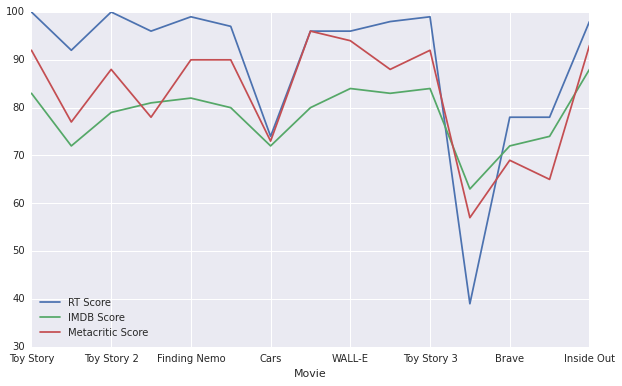

In [3]:
# dataframe containing only the different critics scores from all three providers
critics_reviews = pixar_movies[["RT Score", "IMDB Score", "Metacritic Score"]]

# plot all the reviews in a single line plot
critics_reviews.plot(figsize=(10, 6))
plt.show()

create a box plot to to see the distribution of reviews for each provider individually

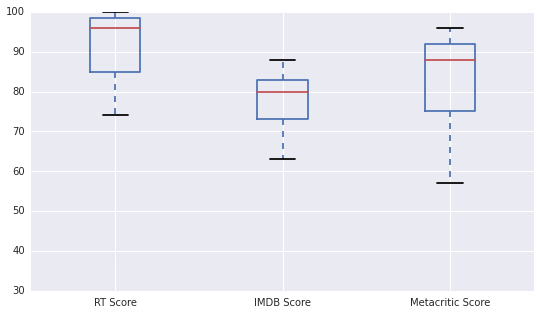

In [4]:
# plot the distribution of the reviews in a box plot
critics_reviews.plot(kind="box", figsize=(9, 5))
plt.show()

create a stacked bar plot of the "Domestic %" and "International %" column

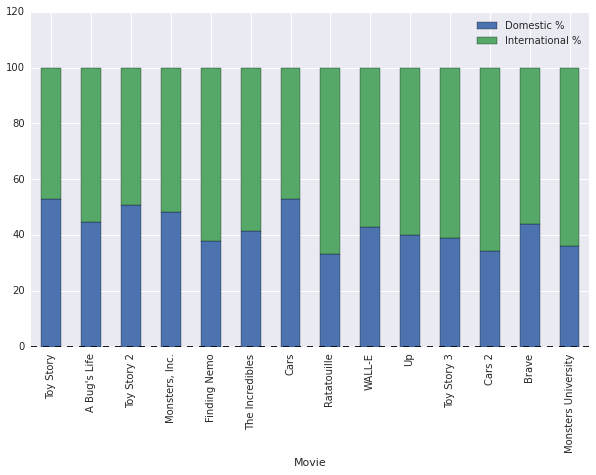

In [5]:
# create new dataframe containing only the percentage numbers of the total revenue made
# in the US and internationally
revenue_proportions = filtered_pixar[["Domestic %", "International %"]]

# plot the numbers in a stacked bar plot
revenue_proportions.plot(kind="bar", stacked=True, figsize=(10, 6))

In [7]:
# create new dataframe containing only the number of oscars a movie was nominated for and
# the number it actually won
oscars_nominated_won = filtered_pixar[["Oscars Nominated", "Oscars Won"]]

print(oscars_nominated_won)

                     Oscars Nominated  Oscars Won
Movie                                            
Toy Story                           3           0
A Bug's Life                        1           0
Toy Story 2                         1           0
Monsters, Inc.                      3           1
Finding Nemo                        4           1
The Incredibles                     4           2
Cars                                2           0
Ratatouille                         5           1
WALL-E                              6           1
Up                                  5           2
Toy Story 3                         5           2
Cars 2                              0           0
Brave                               1           1
Monsters University                 0           0
